In [1]:
from tensor.operation.generate import coil100_data, random_tensor
import threading
import time
import matplotlib.pyplot as plt
try:
    import wget
except:
    %pip install wget

from tensor.decomposition.cpals import CP_ALS
from tensor.decomposition.cprand import CP_RAND


## Fit the model

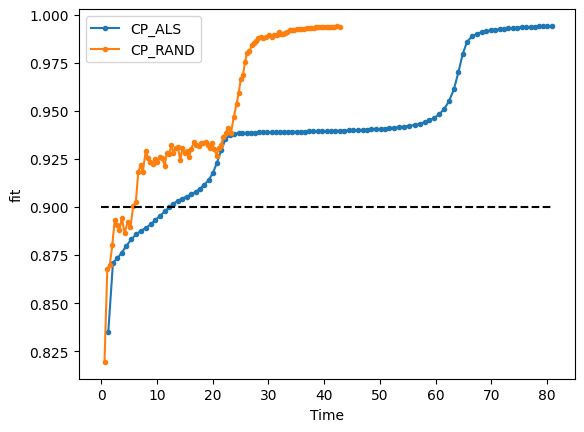

In [4]:
I = 200

X = random_tensor(3, (I, I, I), 5, 0.01)

_, stat1 = CP_ALS.decompose(X, 5, 100, 0.0001)
_, stat2 = CP_RAND.decompose(X, 5, 100, 0.0001)


plt.plot(stat1["cum_fit_time"], stat1["fit"], '.-', label="CP_ALS")
plt.plot(stat2["cum_fit_time"], stat2["fit"], '.-', label="CP_RAND")
plt.hlines(0.9, 0, stat1["cum_fit_time"][-1],  colors='k', linestyles='dashed')
plt.legend()
plt.xlabel("Time")
plt.ylabel("fit")
plt.show()


## Time per iteration

In [ ]:
cpals_avg_time = []
cprand_avg_time = []
n = 2 # number of times to run the experiment for taking average
l, w, s = 200, 250, 10

for I in range(l, w, s):
    X  = random_tensor(3, (I,I,I), 7, 0.01)
    start = time.time()
    for _ in range(n):
       CP_ALS.decompose(X, 5, max_iter=100, eps=0.01, init_type="random", check_convergence=False)
    end = time.time()
    cpals_avg_time.append((end-start)/(n*100))

    start = time.time()
    for _ in range(n):
        CP_RAND.decompose(X, 5, max_iter=100, eps=0.01, init_type="random", check_convergence=False)
    end = time.time()
    cprand_avg_time.append((end-start)/(n*100))
    print(f"For I = {I}, CP_ALS avg time = {cpals_avg_time[-1]}, CP_RAND avg time = {cprand_avg_time[-1]}")


plt.plot(range(l,w,s), cpals_avg_time, 'o-')    
plt.plot(range(l,w,s), cprand_avg_time, 'o-')
plt.legend(["CP_ALS", "CP_RAND"])
plt.xlabel("I")
plt.ylabel("Avg time taken per iteration")
plt.show()


# Stopping Criteria

In [ ]:
from tensor.operation.generate import coil100_data, random_tensor
import threading
import time
# %pip install matplotlib
import matplotlib.pyplot as plt
try:
    import wget
except:
    %pip install wget

from tensor.decomposition.cpals import CP_ALS
from tensor.decomposition.cprand import CP_RAND

cpals_avg_time_exact = []
cpals_avg_time_sampled = []

n = 4 # number of times to run the experiment for taking average
l, w, s = 100, 250, 10


for I in range(l, w, s):
   X  = random_tensor(3, (I,I,I), 7, 0.01)
   start = time.time()
   for _ in range(n):
      CP_ALS.decompose(X, 5, max_iter=100, eps=0.01, init_type="random", check_convergence=True)
   end = time.time()
   cpals_avg_time_exact.append((end-start)/(n*100))

   start = time.time()
   for _ in range(n):
      CP_ALS.decompose(X, 5, max_iter=100, eps=0.01, init_type="random", check_convergence=True, stopping_criteria="sampled")
   end = time.time()
   cpals_avg_time_sampled.append((end-start)/(n*100))

   print(f"For I = {I}, CP_ALS avg time (exact) = {cpals_avg_time_exact[-1]}, CP_ALS avg time (sampled) = {cpals_avg_time_sampled[-1]}")



plt.plot(range(l,w,s), cpals_avg_time_exact, 'o-')    
plt.plot(range(l,w,s), cpals_avg_time_sampled, 'o-')
# plt.plot(range(l,w,s), cprandmix_avg_time, 'o-')
plt.legend(["Exact", "Sampled"])
plt.xlabel("I")
plt.ylabel("Avg Time per Iteration (Order: 3)")
plt.show()
